# Lab 9 - *k*-means

In this lab, we will use an unsupervised machine learning model, *k*-means for customer segmentation. So we will look at unlabeled data to find different classes/types of customers.

## Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualisation 
import seaborn as sns  #Python library for Vidualization

## Read data and explore

In [3]:
# import the dataset

dataset = pd.read_csv('Mall_Customers.csv')

# Exploratory Data Analysis
# As this is unsupervised learning, the label (target feature) is unknown

dataset.head(10) # print first 10 rows of the dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# total rows and colums in the dataset
dataset.shape

(200, 5)

In [5]:
dataset.info() # looks like there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
# missing values
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature Selection

In [7]:
# We're looking at only 2 features (Annual income and Spending Score) 
X= dataset.iloc[:, [3,4]].values

## Build the model

In [9]:
# kmeans algorithm to find the best number of clusters, kmeans++ using Elbow 
# (see https://en.wikipedia.org/wiki/Elbow_method_(clustering)) method (value for *k*)
from sklearn.cluster import KMeans
wcss=[]

# let's assume the max number of clusters is 10
# estimate the number of clusters by averaging

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

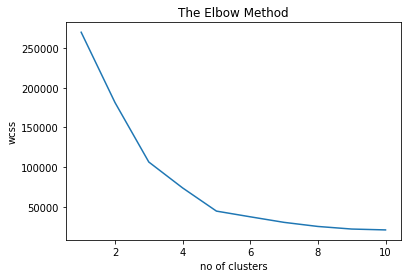

In [10]:
# Visualising the ELBOW method to get the optimal value of *k* 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
# We will take the last elbow (inflection point) at k=5
# build the model 
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

# For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
# y_kmeans is the final model
# This is a very common use case for customer segmenattion in retail.

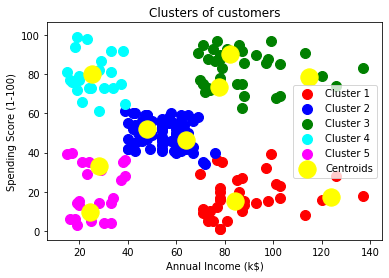

In [15]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [16]:
# Model Interpretation:
# cluster 1 (red) -> income high, but spending low
# cluster 2 (blue) -> average in terms of income and spending 
# cluster 3 (green) -> income high and also spending high [TARGET SET]
# cluster 4 (cyan) -> income low, but spending high
#Cluster 5 (magenta) -> income low, spending low


# The most interesting cluster is no. 3, so we could use an alerting system to send them daily mails
# as they seem to be an easy target, for others once in a week or once in a month would be enough.